In [1]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
# load model without classifier layers
#model = VGG16(include_top=False, input_shape=(300, 300, 3))

Using TensorFlow backend.


In [2]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
from tensorflow.keras import Input

fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)
# load an image from file
#image = load_img('dog.jpg', target_size=(224, 224))
import cv2

image=dat['stimuli'][0,:,:]
image=cv2.resize(image,(224,224))
print(image.shape)
# convert the image pixels to a numpy array
image = img_to_array(image)
#img_input = Input(shape=(img_size_target,img_size_target,1))
image=np.repeat(image,3,axis=2)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model.layers.pop()
input_tensor=Input(shape=(128, 128, 3))
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
#dump(features, open('dog.pkl', 'wb'))

(224, 224)
(1, 4096)


In [3]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [4]:
#plt.imshow(features.reshape((224,224)))

ValueError: cannot reshape array of size 4096 into shape (224,224)

In [ ]:
# plot all 64 maps in an 8x8 squares
import matplotlib.pyplot as plt
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(features[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
(224, 224)


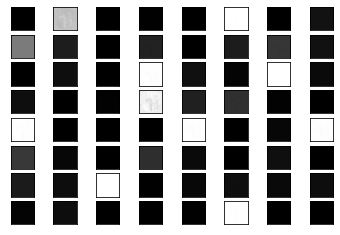

In [17]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
image=dat['stimuli'][0,:,:]
image=cv2.resize(image,(224,224))
print(image.shape)
# convert the image pixels to a numpy array
image = img_to_array(image)
#img_input = Input(shape=(img_size_target,img_size_target,1))
image=np.repeat(image,3,axis=2)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
feature_maps = model.predict(image)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

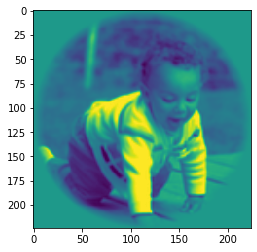

In [22]:
plt.imshow(image.reshape(224,224,-1)[:,:,0])

In [7]:
feature_maps.shape

(1, 224, 224, 64)

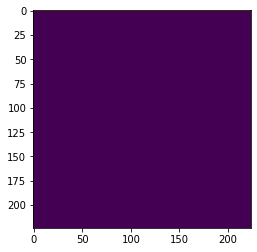

In [13]:
plt.imshow(feature_maps[0,:,:,10])

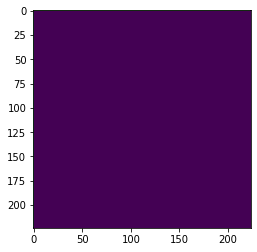

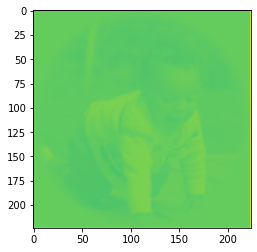

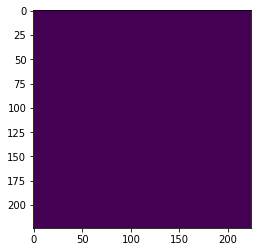

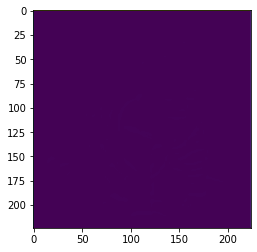

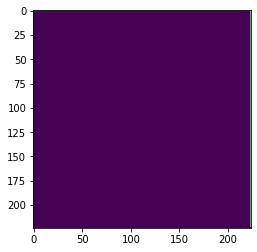

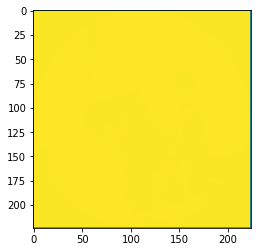

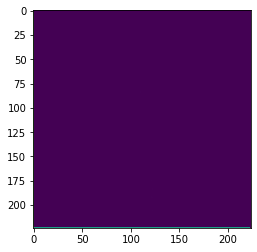

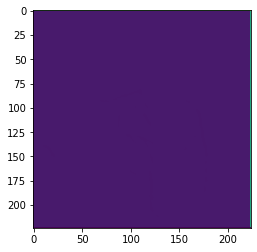

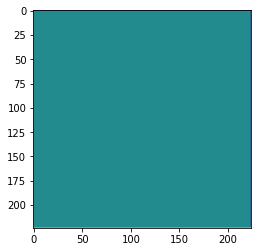

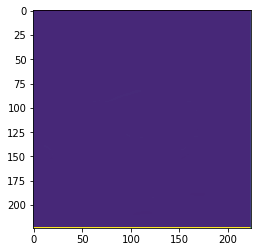

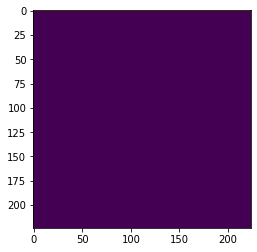

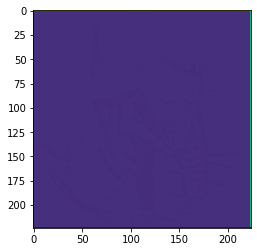

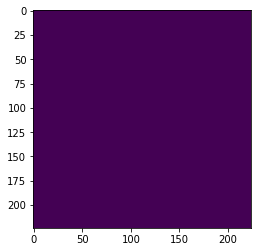

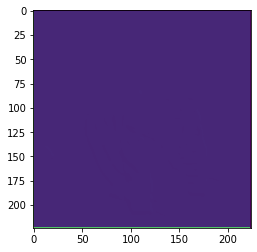

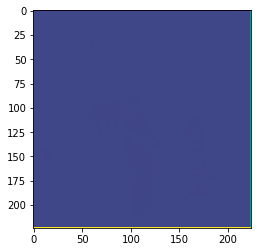

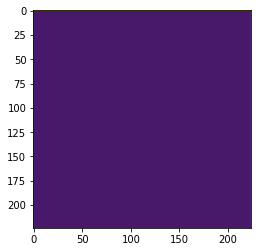

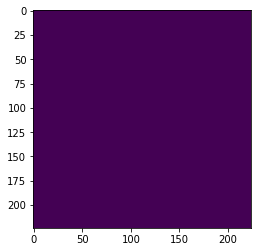

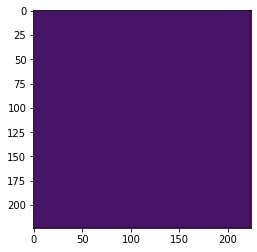

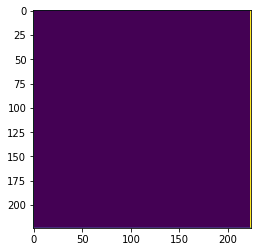

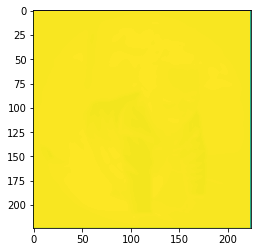

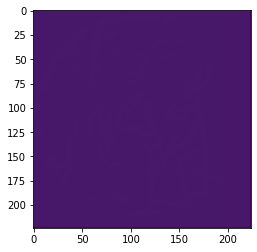

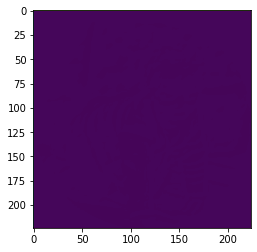

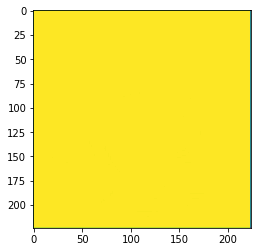

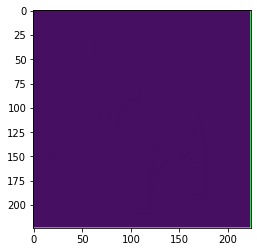

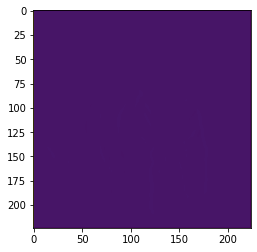

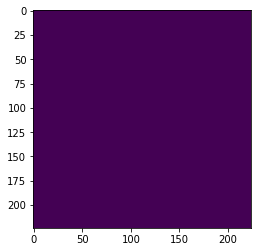

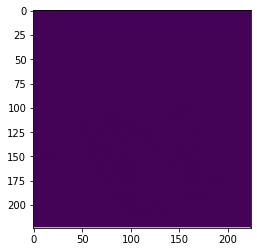

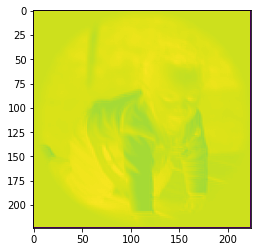

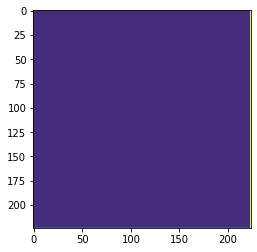

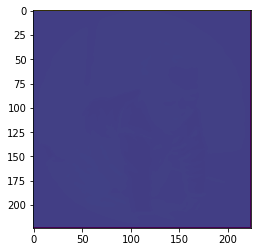

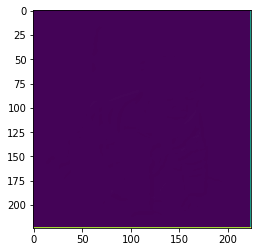

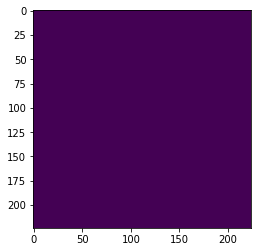

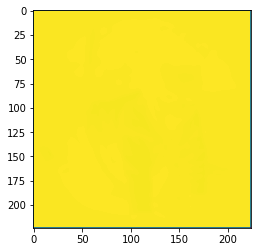

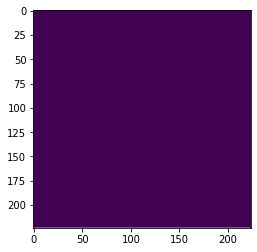

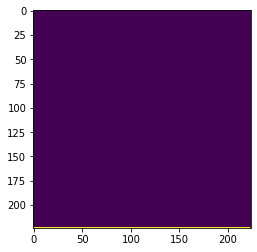

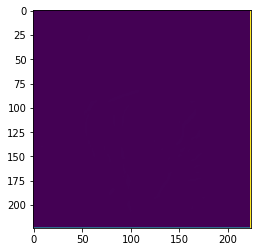

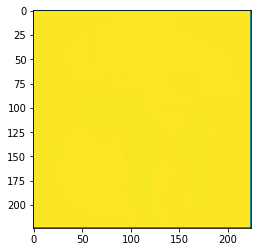

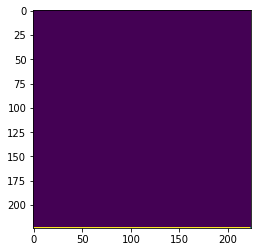

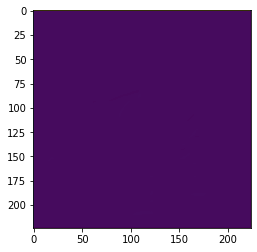

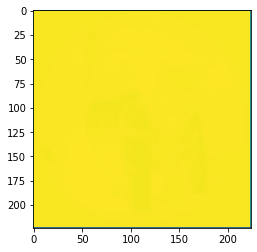

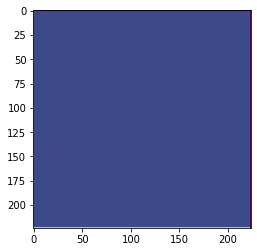

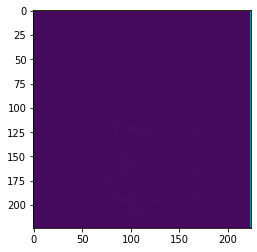

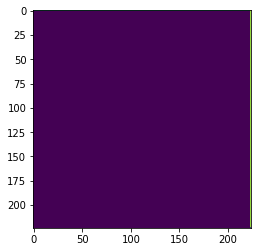

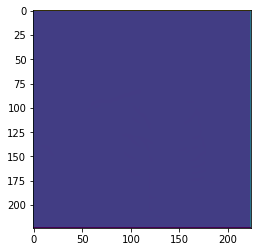

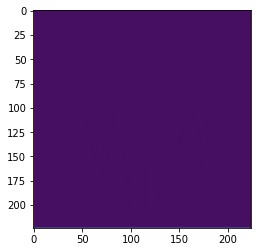

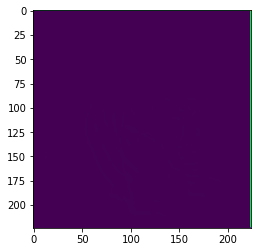

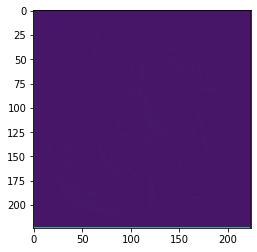

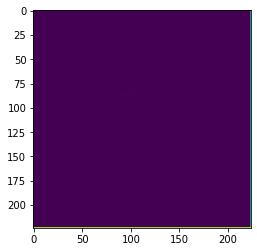

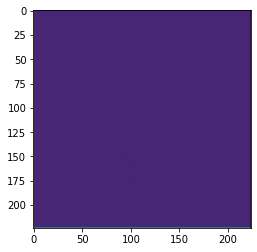

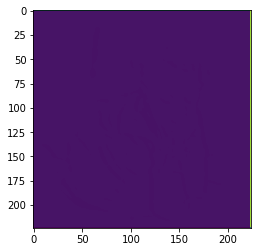

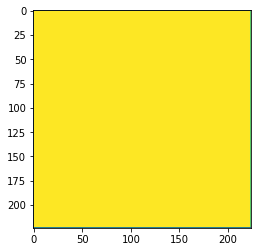

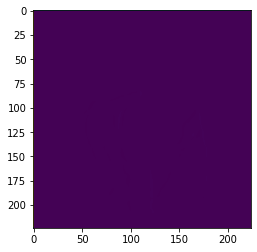

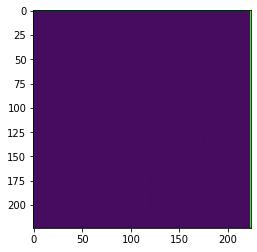

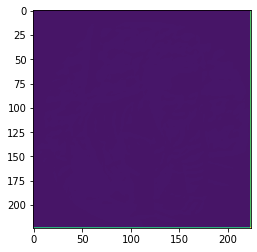

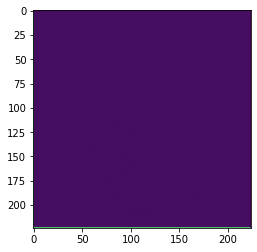

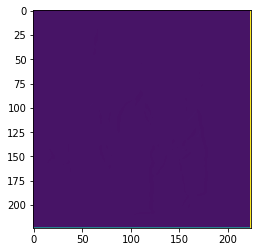

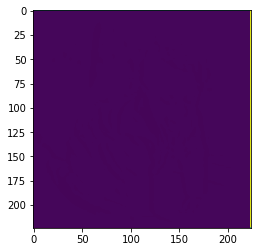

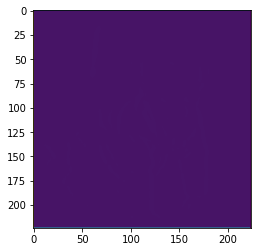

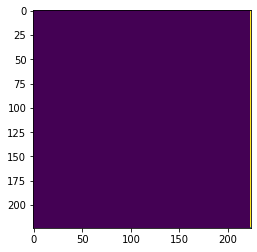

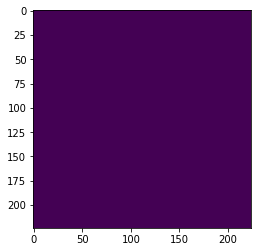

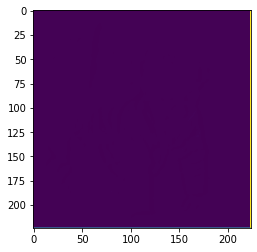

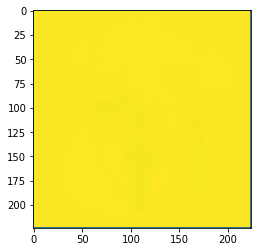

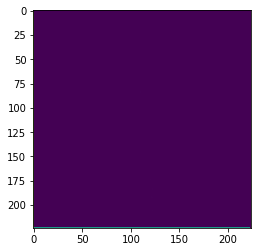

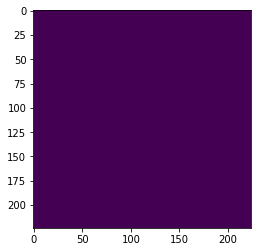

In [15]:
for j in range(0,64):
    plt.imshow(feature_maps[0,:,:,j])
    plt.show()